- **Nama:** Hans Kristiandi
- **Email:** hanskristiandi@gmail.com
- **ID Dicoding:** MC006D5Y2205

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hansk88/Proyek-2/refs/heads/main/bank_transactions_data_after_clustering.csv')
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_original,Location_original,Channel_original,CustomerOccupation_original,cluster_id
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,0


In [3]:
# Encode data kategorikal
label_encoder = LabelEncoder()

# List kolom kategorikal yang di-encode
categorical_columns = ['TransactionType_original', 'Location_original', 'Channel_original', 'CustomerOccupation_original']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Tampilkan dataframe untuk memastikan encoding telah diterapkan
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_original,Location_original,Channel_original,CustomerOccupation_original,cluster_id
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,1
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,1
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,1
4,13.45,26.0,198.0,1.0,7429.40,0,1,2,3,0


In [4]:
# Normalisasi kolom numerik
scaler = MinMaxScaler()

# Mengeluarkan kolom label
exclude_columns = ['cluster_id']

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
selected_columns = [col for col in numeric_columns if col not in exclude_columns]

df[selected_columns] = scaler.fit_transform(df[selected_columns])
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_original,Location_original,Channel_original,CustomerOccupation_original,cluster_id
0,0.007207,0.838710,0.244828,0.0,0.336832,1.0,0.857143,0.0,0.0,1
1,0.195940,0.806452,0.451724,0.0,0.918055,1.0,0.357143,0.0,0.0,0
2,0.065680,0.016129,0.158621,0.0,0.068637,1.0,0.547619,1.0,1.0,1
3,0.096016,0.129032,0.051724,0.0,0.569198,1.0,0.785714,1.0,1.0,1
4,0.006874,0.129032,0.648276,0.0,0.492591,0.0,0.023810,1.0,1.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Memisahkan kolom fitur (X) dan label (y)
X = df.drop(columns=['cluster_id'])
y = df['cluster_id']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 9), y_train=(2009,)
Test set shape: X_test=(503, 9), y_test=(503,)


Dilakukan splitting data dengan komposisi 80% untuk data latih dan 20% untuk data uji

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
# Pelatihan Model

knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Pelatihan model selesai.")

Pelatihan model selesai.


Pada pelatihan model, semua algoritma klasifikasi yang ada pada modul yaitu KNN, decision tree, random forest, SVM, dan NB diterapkan dalam data latih. Tujuannya adalah untuk mengetahui algoritma mana yang memberikan hasil terbaik

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [7]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat dataframe untuk mengisi hasil evaluasi
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall']
    })

summary_df = pd.DataFrame(rows)

# Menampilkan dataframe
print(summary_df)

                          Model  Accuracy  F1-Score  Precision    Recall
0     K-Nearest Neighbors (KNN)  0.896620  0.880633   0.927681  0.845729
1            Decision Tree (DT)  1.000000  1.000000   1.000000  1.000000
2            Random Forest (RF)  1.000000  1.000000   1.000000  1.000000
3  Support Vector Machine (SVM)  0.968191  0.977113   0.975565  0.978882
4              Naive Bayes (NB)  0.982107  0.952858   0.925775  0.987371


Setelah dilakukan pelatihan model dengan berbagai algoritma, didapati bahwa akurasi dan F1-Score algoritma decision tree dan random forest mencapai 100% dan algoritma SVM dan NB lebih besar dari 92%. Sementara itu, KNN memiliki nilai akurasi dan F1 score yang paling kecil di antara algoritma lainnya, namun masih cukup baik

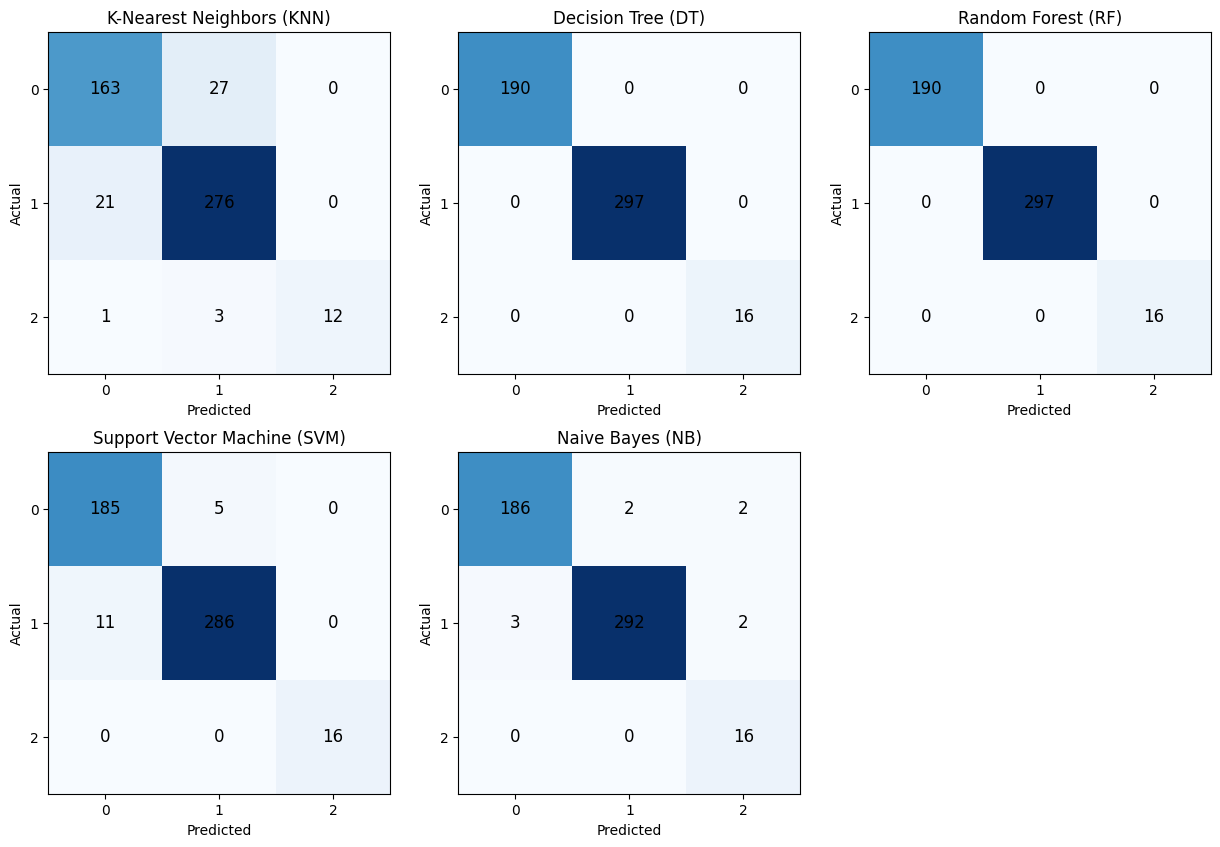

In [8]:
# Menampung algoritma pelatihan model
models = {
    'K-Nearest Neighbors (KNN)': knn,
    'Decision Tree (DT)': dt,
    'Random Forest (RF)': rf,
    'Support Vector Machine (SVM)': svm,
    'Naive Bayes (NB)': nb
}

class_labels = np.unique(y_test)

# Mmebuat confusion matriks
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    axes[i].imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    axes[i].set_title(model_name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

    axes[i].set_xticks(np.arange(len(class_labels)))
    axes[i].set_yticks(np.arange(len(class_labels)))
    axes[i].set_xticklabels(class_labels)
    axes[i].set_yticklabels(class_labels)

    for (j, k), value in np.ndenumerate(cm):
        axes[i].text(k, j, str(value), ha="center", va="center", color="black", fontsize=12)

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [9]:
# Menghitung akurasi untuk data latih
accuracy_train_dt = accuracy_score(y_train, dt.predict(X_train))
accuracy_train_rf = accuracy_score(y_train, rf.predict(X_train))
accuracy_train_knn = accuracy_score(y_train, knn.predict(X_train))
accuracy_train_svm = accuracy_score(y_train, svm.predict(X_train))
accuracy_train_nb = accuracy_score(y_train, nb.predict(X_train))

# Menghitung akurasi untuk data uji
accuracy_dt = accuracy_score(y_test, dt.predict(X_test))
accuracy_rf = accuracy_score(y_test, rf.predict(X_test))
accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm.predict(X_test))
accuracy_nb = accuracy_score(y_test, nb.predict(X_test))

overfit_underfit = {
    "Model": ["Decision Tree", "Random Forest", "KNN", "SVM", "Naive Bayes"],
    "Training Accuracy": [accuracy_train_dt, accuracy_train_rf, accuracy_train_knn, accuracy_train_svm, accuracy_train_nb],
    "Test Accuracy": [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb]
}

df_overfit_underfit = pd.DataFrame(overfit_underfit)

print(df_overfit_underfit)

           Model  Training Accuracy  Test Accuracy
0  Decision Tree           1.000000       1.000000
1  Random Forest           1.000000       1.000000
2            KNN           0.952713       0.896620
3            SVM           0.986560       0.968191
4    Naive Bayes           0.981583       0.982107


Analisis:
- Untuk algoritma Decision Tree, akurasi pada data latih dan data uji sama yaitu 100%. Namun algoritma ini tidak dipilih karena tingkat akurasinya yang terlalu sempurna
- Untuk algoritma Random Forest, akurasi pada data latih dan data uji sama yaitu 100%. Namun algoritma ini tidak dipilih karena tingkat akurasinya yang terlalu sempurna
- Untuk algoritma KNN, akurasi pada data latih sebesar 95.27% sedangkan akurasi data uji hanya 89.66%, menunjukkan indikasi adanya overfitting sehingga algoritma ini tidak dipilih
- Untuk algoritma **SVM**, akurasi pada data uji menurun 1.84% dibandingkan dengan akurasi pada data latih sehingga dapat dikatakan bahwa model masih dalam kategori baik dan tidak overfitting maupun underfitting sehingga algoritma ini akan dipilih
- Untuk algoritma **NB**, akurasi pada data uji meningkat 0.06% dibandingkan dengan akurasi pada data latih sehingga dapat dikatakan bahwa model masih dalam kategori baik dan tidak overfitting maupun underfitting sehingga algoritma ini akan dipilih

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [11]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [12]:
# Memilih dua algoritma dengan performa terbaik

result = {
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

selected_algorithm = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

row = []
for model_name, metrics in result.items():
    row.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall']
    })

summary_df = pd.DataFrame(row)

# Menampilkan dua algoritma terbaik yang dilengkapi dengan hasil evaluasi dari data uji
summary_df

,Model,Accuracy,F1-Score,Precision,Recall
0,Support Vector Machine (SVM),0.968191,0.977113,0.975565,0.978882
1,Naive Bayes (NB),0.982107,0.952858,0.925775,0.987371


Pada kasus ini, tidak dilakukan tuning model karena akurasi dan F1-score data uji sudah baik. Setelah dicek, kedua algoritma yang terpilih juga tidak mengalami overfitting dan underfitting. Selain itu, dalam berbagai pemeriksaan yang dilakukan, tidak ditemukan adanya kelemahan pada model dalam hal akurasi, presisi, recall, dan sebagainya. Hanya saja sebagai catatan, persentase akurasi, F1 score, presisi, dan sebagainya yang terlalu bagus mungkin dapat disertai dengan pengujian dengan data sesungguhnya (ukuran data yang jauh lebih besar dan lebih bervariasi), menggunakan metode yang lebih advanced (misal deep learning), dan melakukan hyperparameter tuning